In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster

In [2]:
# We will use the iris dataset as an example
# Load the dataset
df = sns.load_dataset("iris")
# Display first five rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


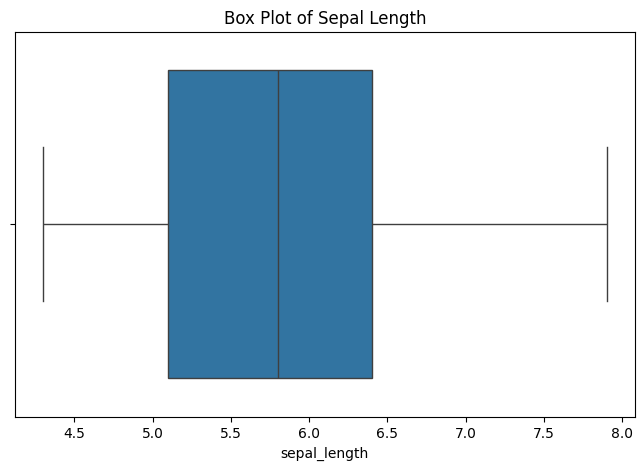

Outliers:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


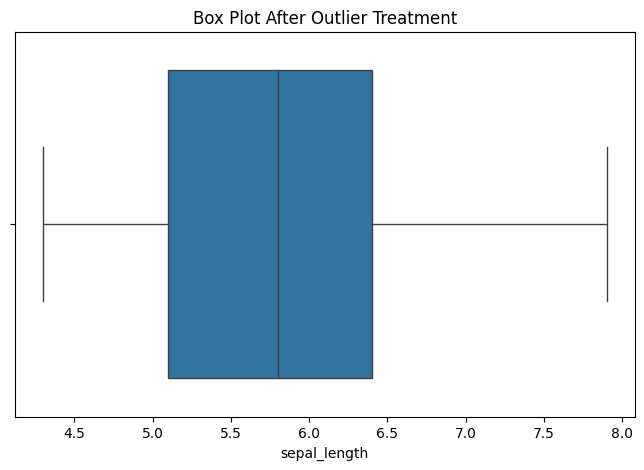

In [3]:
# A box plot helps in identifying outliers. We can remove or transform outliers based on the business context.
# Create a box plot for Sepal Length
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sepal_length"])
plt.title("Box Plot of Sepal Length")
plt.show()
# Identify outliers using IQR method
Q1 = df["sepal_length"].quantile(0.25)
Q3 = df["sepal_length"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["sepal_length"] < lower_bound) | (df["sepal_length"] > upper_bound)]
print("Outliers:\n", outliers)
# Treating Outliers (Capping)
df["sepal_length"] = np.where(df["sepal_length"] > upper_bound, upper_bound,np.where(df["sepal_length"] < lower_bound, lower_bound, df["sepal_length"]))
# Re-check Box Plot after treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sepal_length"])
plt.title("Box Plot After Outlier Treatment")
plt.show()

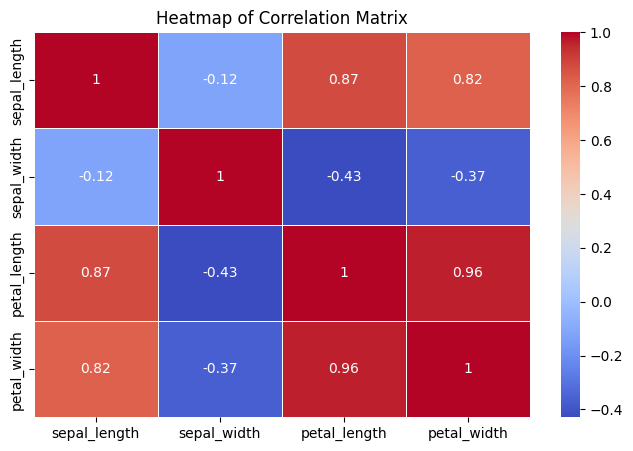

In [4]:
# A heatmap provides a visual representation of correlation between different features.
# Compute correlation matrix
corr_matrix = df.drop(columns=["species"]).corr()
# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

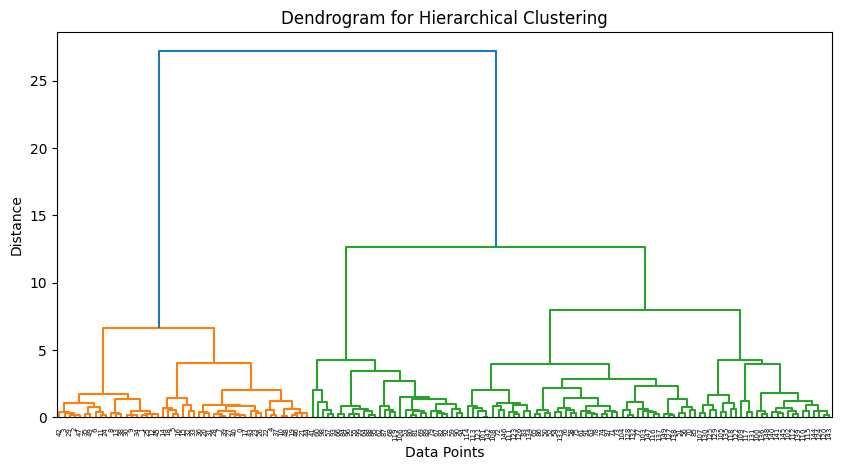

In [5]:
# A dendrogram helps in visualizing hierarchical clustering.
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["species"]))
# Generate dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

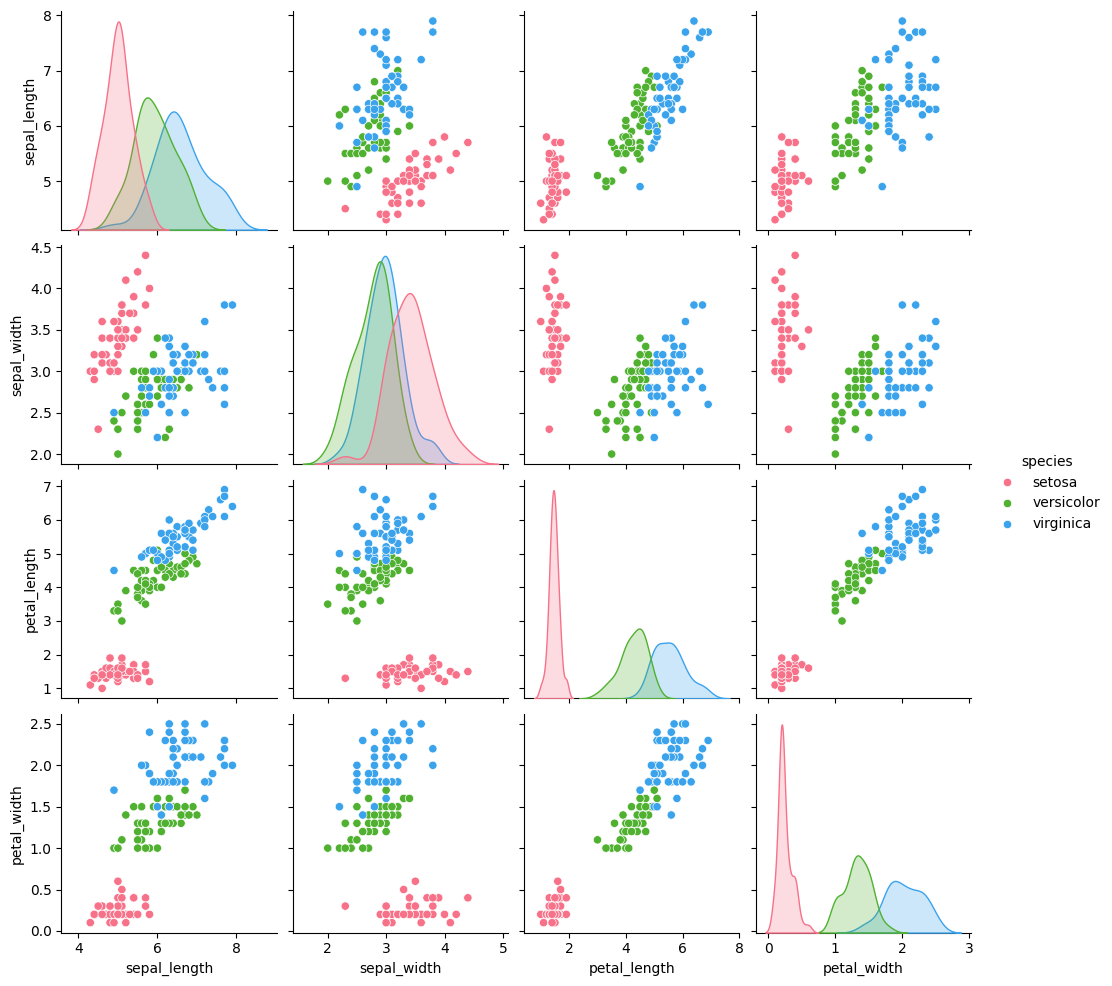

In [6]:
#A pair plot visualizes pairwise relationships between features.
# Pair plot with species differentiation
sns.pairplot(df, hue="species", palette="husl")
plt.show()

In [8]:
# For geographical visualization, we use a Point Map.
# Sample latitude and longitude points (random example)
location_data = pd.DataFrame({
 'latitude': [28.6139, 19.0760, 12.9716, 22.5726, 13.0827], # Locationsin India
 'longitude': [77.2090, 72.8777, 77.5946, 88.3639, 80.2707],
 'city': ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai']
})
# Create map centered at an average location
m = folium.Map(location=[20, 78], zoom_start=5)
# Add markers
marker_cluster = MarkerCluster().add_to(m)
for idx, row in location_data.iterrows():
 folium.Marker([row['latitude'], row['longitude']], popup=row['city']).add_to(marker_cluster)
# Display the map
m